**Introduction**
The following document includes some exploratory data analysis for the soil and tree data sets downloaded from the FIA datamart in order to further narrow down our project plan. Then as a conclusion, certian datasets will be selected for the project and the project plan will be narrowed.


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")

**Soil EDA**

**WA_SOIL_LAB** from FIA Datamart

In [41]:
soil_data = pd.read_csv("../Data/WA_SOILS_LAB.csv")

In [42]:
print(soil_data.columns)
soil_data.head(5)

Index(['CN', 'PLT_CN', 'INVYR', 'STATECD', 'COUNTYCD', 'PLOT', 'SMPLNNBR',
       'VSTNBR', 'LAYER_TYPE', 'SAMPLER_TYPE', 'QASTATCD', 'SAMPLE_DATE',
       'LAB_ID', 'SAMPLE_ID', 'FIELD_MOIST_SOIL_WT', 'AIR_DRY_SOIL_WT',
       'OVEN_DRY_SOIL_WT', 'FIELD_MOIST_WATER_CONTENT_PCT',
       'RESIDUAL_WATER_CONTENT_PCT', 'TOTAL_WATER_CONTENT_PCT', 'BULK_DENSITY',
       'COARSE_FRACTION_PCT', 'C_ORG_PCT', 'C_INORG_PCT', 'C_TOTAL_PCT',
       'N_TOTAL_PCT', 'PH_H2O', 'PH_CACL2', 'EXCHNG_NA', 'EXCHNG_K',
       'EXCHNG_MG', 'EXCHNG_CA', 'EXCHNG_AL', 'ECEC', 'EXCHNG_MN', 'EXCHNG_FE',
       'EXCHNG_NI', 'EXCHNG_CU', 'EXCHNG_ZN', 'EXCHNG_CD', 'EXCHNG_PB',
       'EXCHNG_S', 'BRAY1_P', 'OLSEN_P', 'MEASYEAR', 'MODIFIED_DATE',
       'CREATED_DATE'],
      dtype='object')


,CN,PLT_CN,INVYR,STATECD,COUNTYCD,PLOT,SMPLNNBR,VSTNBR,LAYER_TYPE,SAMPLER_TYPE,...,EXCHNG_CU,EXCHNG_ZN,EXCHNG_CD,EXCHNG_PB,EXCHNG_S,BRAY1_P,OLSEN_P,MEASYEAR,MODIFIED_DATE,CREATED_DATE
0,29198811010900,24511125010900,2003,53,7,87942,2,1.0,FF_TOTAL,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,2018-02-23 20:56:54,2008-05-14 15:09:13
1,29198813010900,24511125010900,2003,53,7,87942,2,1.0,MIN_1,BD,...,0.0,0.50,0.00,0.53,0.00,273.00,NaN,2003,2018-02-23 20:56:54,2008-05-14 15:09:13
2,29198814010900,24511125010900,2003,53,7,87942,2,1.0,MIN_2,BD,...,0.0,0.12,-0.02,0.14,9.39,130.57,NaN,2003,2018-02-23 20:56:54,2008-05-14 15:09:13
3,29198812010900,24511125010900,2003,53,7,87942,3,1.0,FF_TOTAL,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,2018-02-23 20:56:54,2008-05-14 15:09:13
4,29198807010900,24515062010900,2003,53,9,62049,2,1.0,FF_TOTAL,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,2018-02-23 20:56:54,2008-05-14 15:09:13


In [49]:
soil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CN                             290 non-null    int64  
 1   PLT_CN                         290 non-null    int64  
 2   INVYR                          290 non-null    int64  
 3   STATECD                        290 non-null    int64  
 4   COUNTYCD                       290 non-null    int64  
 5   PLOT                           290 non-null    int64  
 6   SMPLNNBR                       290 non-null    int64  
 7   VSTNBR                         280 non-null    float64
 8   LAYER_TYPE                     290 non-null    object 
 9   SAMPLER_TYPE                   290 non-null    object 
 10  QASTATCD                       290 non-null    int64  
 11  SAMPLE_DATE                    290 non-null    object 
 12  LAB_ID                         290 non-null    obj

It looks like we only have less than half of the data for carbon, pH, and other metals. Before dropping them, let's do some eda with water percentage.

In [44]:
new_soil=soil_data.dropna(subset=['EXCHNG_FE'])

In [48]:
new_soil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 1 to 288
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CN                             105 non-null    int64  
 1   PLT_CN                         105 non-null    int64  
 2   INVYR                          105 non-null    int64  
 3   STATECD                        105 non-null    int64  
 4   COUNTYCD                       105 non-null    int64  
 5   PLOT                           105 non-null    int64  
 6   SMPLNNBR                       105 non-null    int64  
 7   VSTNBR                         101 non-null    float64
 8   LAYER_TYPE                     105 non-null    object 
 9   SAMPLER_TYPE                   105 non-null    object 
 10  QASTATCD                       105 non-null    int64  
 11  SAMPLE_DATE                    105 non-null    object 
 12  LAB_ID                         105 non-null    object 


Looks good. Now let's do some EDA.

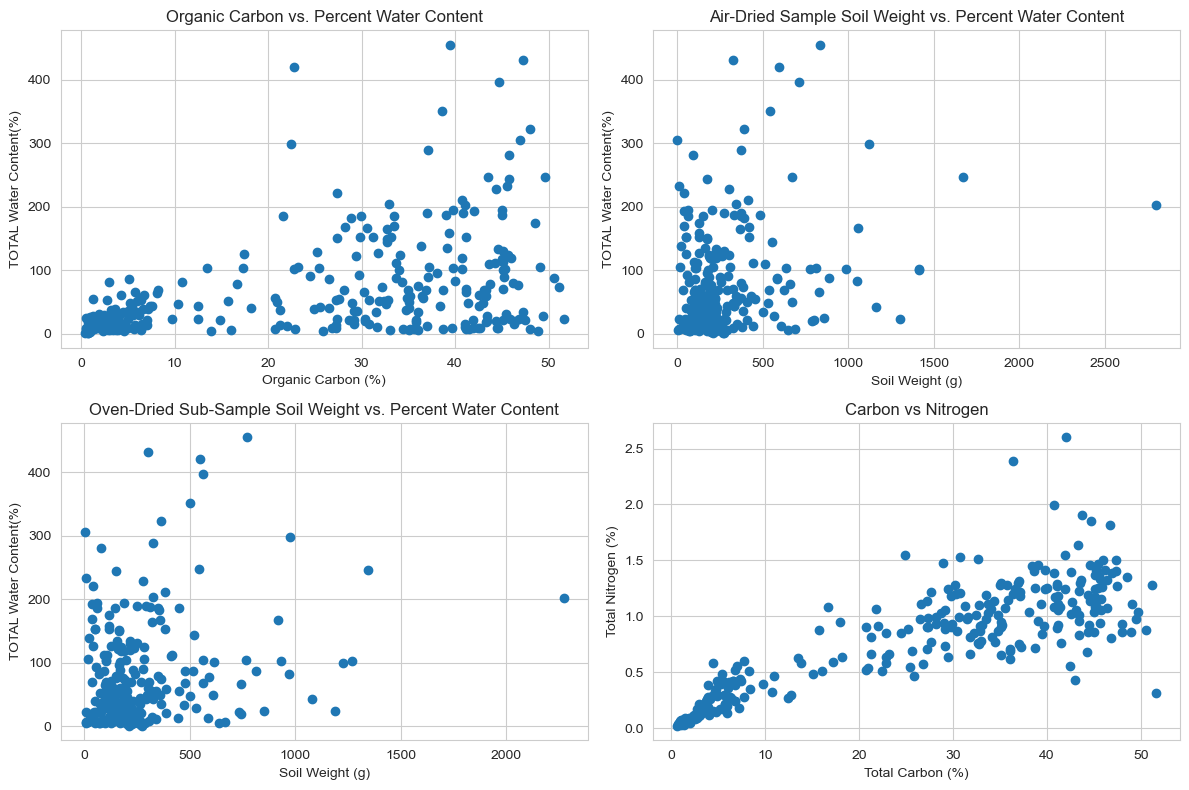

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  
axs = np.ravel(axs)

axs[0].scatter(soil_data['C_ORG_PCT'], soil_data['TOTAL_WATER_CONTENT_PCT'])
axs[0].set_title('Organic Carbon vs. Percent Water Content')  
axs[0].set_xlabel('Organic Carbon (%)')  # Label for X-axis
axs[0].set_ylabel('TOTAL Water Content(%)')  # Label for Y-axis

axs[1].scatter(soil_data['AIR_DRY_SOIL_WT'], soil_data['TOTAL_WATER_CONTENT_PCT'])
axs[1].set_title('Air-Dried Sample Soil Weight vs. Percent Water Content')  
axs[1].set_xlabel('Soil Weight (g)')  # Label for X-axis
axs[1].set_ylabel('TOTAL Water Content(%)')  # Label for Y-axis

axs[2].scatter(soil_data['OVEN_DRY_SOIL_WT'], soil_data['TOTAL_WATER_CONTENT_PCT'])
axs[2].set_title('Oven-Dried Sub-Sample Soil Weight vs. Percent Water Content')  
axs[2].set_xlabel('Soil Weight (g)')  # Label for X-axis
axs[2].set_ylabel('TOTAL Water Content(%)')  # Label for Y-axis

axs[3].scatter(soil_data['C_TOTAL_PCT'], soil_data['N_TOTAL_PCT'])
axs[3].set_title('Carbon vs Nitrogen')  
axs[3].set_xlabel('Total Carbon (%)')  # Label for X-axis
axs[3].set_ylabel('Total Nitrogen (%)')  # Label for Y-axis
plt.tight_layout()

plt.show()

Relationship between carbon and nitrogen which makes sense since the carbon-nitrogen ratio is very important! Seems like ideal carbon-nitrogen ratio is 10:1 to 20:1. 

Let's look at distribution of soil weight and percent water content

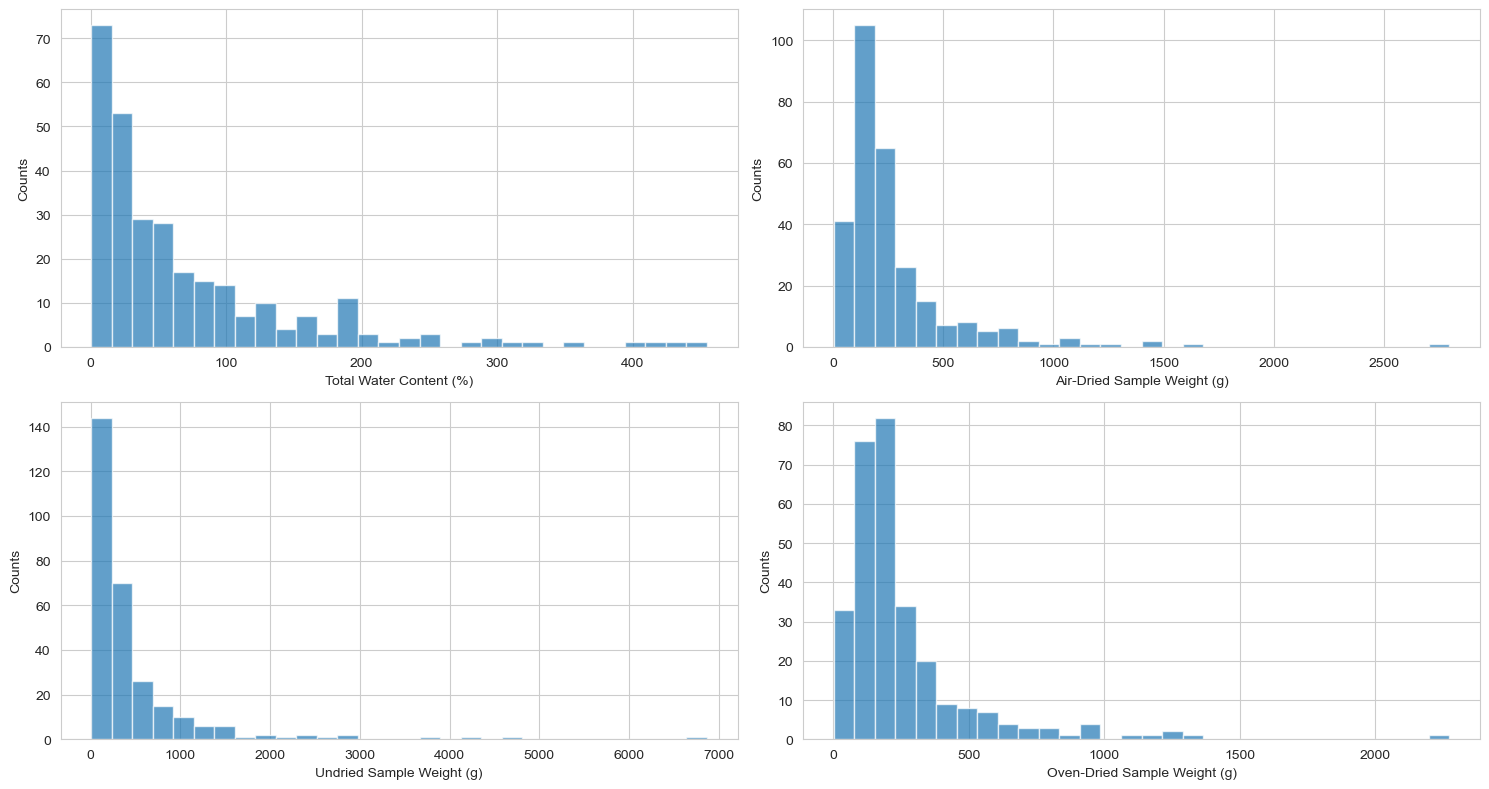

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = np.ravel(axs)

axs[0].hist(soil_data['TOTAL_WATER_CONTENT_PCT'], bins=30, alpha=0.7)  
axs[0].set_xlabel('Total Water Content (%)')  # Label for X-axis
axs[0].set_ylabel('Counts')  # Label for Y-axis

axs[1].hist(soil_data['AIR_DRY_SOIL_WT'], bins=30, alpha=0.7)  
axs[1].set_xlabel('Air-Dried Sample Weight (g)')  # Label for X-axis
axs[1].set_ylabel('Counts')  # Label for Y-axis

axs[2].hist(soil_data['FIELD_MOIST_SOIL_WT'], bins=30, alpha=0.7)  
axs[2].set_xlabel('Undried Sample Weight (g)')  # Label for X-axis
axs[2].set_ylabel('Counts')  # Label for Y-axis

axs[3].hist(soil_data['OVEN_DRY_SOIL_WT'], bins=30, alpha=0.7)  
axs[3].set_xlabel('Oven-Dried Sample Weight (g)')  # Label for X-axis
axs[3].set_ylabel('Counts')  # Label for Y-axis

plt.tight_layout()

plt.show()

Seems to be some outliers as expected in these types of datasets. 

Overall there is not a lot of data to work with here. 290 samples will not be enough likely

**Tree Health EDA** using WA_TREES

In [64]:
wa_tree_data = pd.read_csv("/Users/allierose/Downloads/WA_TREE.csv")

/var/folders/rd/2pn3c7gx2_9_cbdrsq0k0r6r0000gn/T/ipykernel_22910/3443904700.py:1: DtypeWarning: Columns (77,159) have mixed types. Specify dtype option on import or set low_memory=False.
  wa_tree_data = pd.read_csv("/Users/allierose/Downloads/WA_TREE.csv")


In [66]:
print(wa_tree_data.columns)
wa_tree_data.head(5)

Index(['CN', 'PLT_CN', 'PREV_TRE_CN', 'INVYR', 'STATECD', 'UNITCD', 'COUNTYCD',
       'PLOT', 'SUBP', 'TREE',
       ...
       'VOLCSNET_BARK', 'DRYBIO_STEM', 'DRYBIO_STEM_BARK', 'DRYBIO_STUMP_BARK',
       'DRYBIO_BOLE_BARK', 'DRYBIO_BRANCH', 'DRYBIO_FOLIAGE',
       'DRYBIO_SAWLOG_BARK', 'PREV_ACTUALHT_FLD', 'PREV_HT_FLD'],
      dtype='object', length=197)


,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,...,VOLCSNET_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP_BARK,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG_BARK,PREV_ACTUALHT_FLD,PREV_HT_FLD
0,4871760,21864,NaN,2001,53,5,29,11,2,4871760,...,NaN,NaN,NaN,1.214989,20.690842,NaN,NaN,NaN,NaN,NaN
1,4871761,21864,NaN,2001,53,5,29,11,2,4871761,...,NaN,NaN,NaN,13.674053,343.282859,NaN,NaN,NaN,NaN,NaN
2,4879506,21864,NaN,2001,53,5,29,11,2,4879506,...,NaN,NaN,NaN,19.433360,738.157808,NaN,NaN,NaN,NaN,NaN
3,4871762,21865,NaN,2001,53,5,29,15,1,4871762,...,NaN,NaN,NaN,9.565398,204.506428,NaN,NaN,NaN,NaN,NaN
4,4871763,21865,NaN,2001,53,5,29,15,1,4871763,...,NaN,NaN,NaN,20.594949,530.372513,NaN,NaN,NaN,NaN,NaN


In [67]:
wa_tree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504956 entries, 0 to 504955
Columns: 197 entries, CN to PREV_HT_FLD
dtypes: float64(180), int64(13), object(4)
memory usage: 758.9+ MB


Let's look at the uncompacted live crown ratio which is determined by divididing the live crown length by the actual tree length. Crowns are largely known to be indicators of tree health.

In [69]:
wa_tree_data['UNCRCD'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 504956 entries, 0 to 504955
Series name: UNCRCD
Non-Null Count  Dtype  
--------------  -----  
5524 non-null   float64
dtypes: float64(1)
memory usage: 3.9 MB


In [71]:
wa_tree_data_new=wa_tree_data.dropna(subset=['UNCRCD'])

In [76]:
wa_tree_data_new2= wa_tree_data.dropna(subset=['CDENCD'])

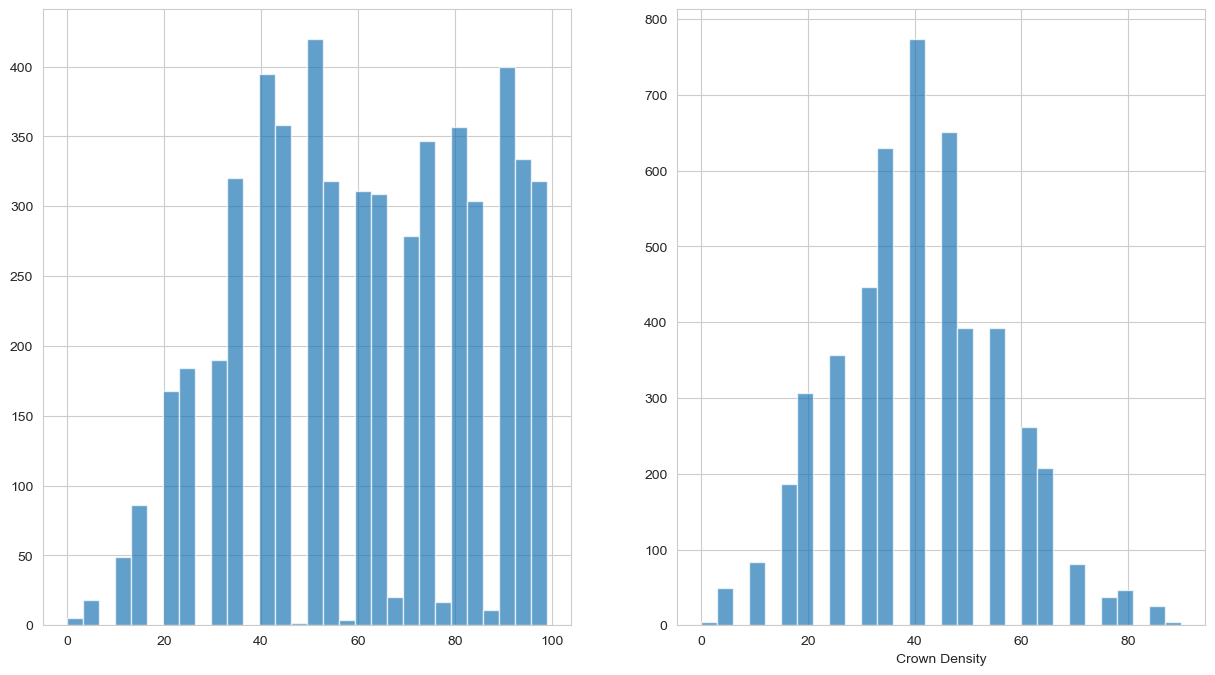

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax = np.ravel(ax)
ax[0].hist(wa_tree_data_new['UNCRCD'], bins=30, alpha=0.7) 
plt.xlabel('Uncompacted Crown Ratio')

ax[1].hist(wa_tree_data_new2['CDENCD'], bins=30, alpha=0.7) 
plt.xlabel('Crown Density')
plt.show()

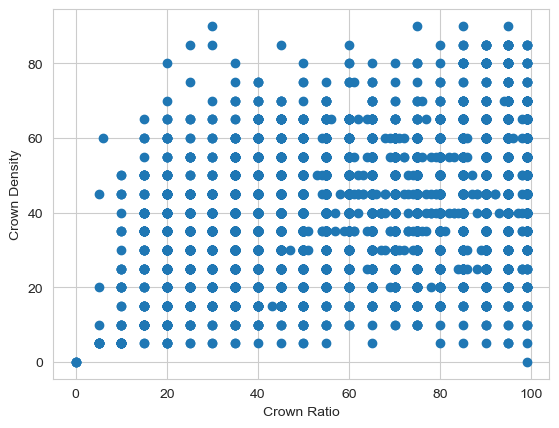

In [83]:
plt.scatter(wa_tree_data_new2['UNCRCD'],wa_tree_data_new2['CDENCD'])
plt.xlabel('Crown Ratio')
plt.ylabel('Crown Density')         
plt.show()

Well, this is not very helpful. Alot more analysis can be done on crown health. There is a lot in this tree data set.